# Rule-based Relation Extraction

In [19]:
import spacy
import scispacy
import en_ner_bc5cdr_md as ner
from spacy import displacy
from spacy.matcher import Matcher
import networkx as nx
import matplotlib.pyplot as plt

### Loading NLP Model
We use the pre-trained NER model `en_ner_bc5cdr_md` as our language model. Since we will be dealing with small chemicals/metabolites, this has the benefit of identifying the relevant biochemical entities from the text. 

In [2]:
nlp = ner.load()

In this notebook, we will be exploring three (3) rule-based approaches to relation extraction, specifically for extracting metabolic reactions. Each approach is shown to be effective for a particular sentence structure and this is used to illustrate the application of each approach.

### Method 1: Dependency Parsing

In [48]:
# filename = "REF-01.txt"
# doc = nlp(open(r"C:\Users\jliwag\Documents\m-path\data\REF-01.txt").read())
# doc = nlp("Caffeine is metabolized extensively to paraxanthine.")
# # doc = nlp("Caffeine metabolizes into paraxanthine.")
# # doc = nlp("L-Arabinose isomerase catalyzes the conversion of L-arabinose to L-ribulose, the first step in the utilization of n-arabinose by Escherichia coli B/r.")
doc = nlp("The remaining 15% of caffeine undergoes C-8 hydroxylation to form paraxanthine.")

In [3]:
# matcher = Matcher(nlp.vocab)
# pattern = [{'LOWER': 'to'}, {'LOWER':'form', 'OP':'?'},{'POS': 'NOUN'}]
# matcher.add('CAND', None, pattern)
# pattern2 = [{'LOWER':'formation'},{'LOWER': 'of'}, {}]
# matcher.add('CAND1', None, pattern2)

In [49]:
doc

The remaining 15% of caffeine undergoes C-8 hydroxylation to form paraxanthine.

In [50]:
entities = [str(ent).lower() for ent in doc.ents]
entities = list(set(entities))
entities

['caffeine', 'paraxanthine']

In [51]:
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
edges

[('%', 'the'),
 ('%', 'remaining'),
 ('%', '15'),
 ('%', 'caffeine'),
 ('caffeine', 'of'),
 ('undergoes', '%'),
 ('undergoes', 'hydroxylation'),
 ('undergoes', 'form'),
 ('undergoes', '.'),
 ('hydroxylation', 'c-8'),
 ('form', 'to'),
 ('form', 'paraxanthine')]

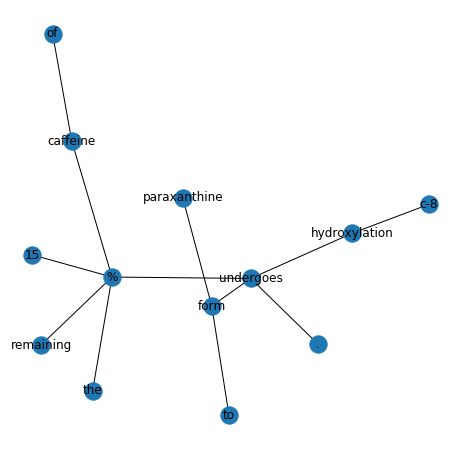

In [52]:
plt.figure(figsize=(8,8))
plt.axis("off")
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=2)
nx.draw_networkx(G, pos, font_color="black", with_labels=True)

In [53]:
entity1 = "caffeine"
entity2 = "paraxanthine"
print(nx.shortest_path(G, source=entity1, target=entity2))

['caffeine', '%', 'undergoes', 'form', 'paraxanthine']


In [54]:
triples = []
# valid_dep = ["nsubjpass","nmod"]
for token in doc:
    if token.dep_ == "ROOT":
        triples.append((token.lemma_,[child.lemma_ for child in token.children if str(child).lower() in entities]))
triples

[('undergo', [])]

### Explicit and Active

In [17]:
doc = nlp ("Caffeine metabolizes into paraxanthine. Some of caffeine ")

In [18]:
doc.ents

(Caffeine, paraxanthine)

In [255]:
# triples = []
# for token in doc:
#     if token.dep_ == "ROOT":
#         triples.append((token.lemma_,[child.lemma_ for child in token.children if child.dep_ != "punct"]))
# triples

In [11]:
# matches = matcher(doc)
# # Iterate over the matches
# for match_id, start, end in matches:
#     # Get the matched span
#     matched_span = doc[start:end]
#     print(matched_span.text)

In [20]:
for token in doc:
    print(token, token.dep_)

Caffeine nsubj
metabolizes ROOT
into case
paraxanthine nmod
. punct


In [8]:
# for chunk in doc.noun_chunks:
#     print(chunk.text, chunk.root.text, chunk.root.dep_,
#             chunk.root.head.text)

Caffeine Caffeine nsubjpass metabolized
The main route route nsubj demethylation
(70-80% % appos humans
This reaction reaction nsubjpass carried
Experiments Experiments nsubj estimate
1-N- demethylation demethylation nsubj accounts
The remaining 15% % nsubj undergoes
C-8 hydroxylation hydroxylation dobj undergoes
1,3,7-trimethyluric acid acid dobj form
CYP1A2 CYP1A2 nsubj responsible
caffeine caffeine nsubjpass used
the major metabolites metabolites nsubj 1-methylxanthine
(1X 1X appos 1-methylxanthine
1-methyluric acid acid conj 1-methylxanthine
(1U 1U appos acid
5-acetylamino-6-formylamino-3-methyluracil 5-acetylamino-6-formylamino-3-methyluracil conj 1-methylxanthine
(AFMU AFMU appos 5-acetylamino-6-formylamino-3-methyluracil
1,7-dimethyluric acid acid conj 1-methylxanthine
In vitro studies studies nsubj show
involvement involvement dobj show
studies studies nsubj support
it it nsubj contributes
Microsome experiments experiments nsubj shown
CYP2C8 CYP2C8 nsubj participate
CYP2C9 CYP2